# How to Use This Homework:
**This homework assignment is a Colab Notebook. Before running or editing anything, make a copy of the notebook. That way it will actually save the progress**



# Intro to Numpy

## What is Numpy and why do we use it?

It's an awesome python package that adds support for large, multi-dimensional arrays. Really good for vector operations, matrix operations because its super parallelized so its super fast!

## Why not Python lists?

Python lists have certain limitations: they don’t support “vectorized” operations like elementwise addition and multiplication, and the fact that they can contain objects of differing types mean that Python must store type information for every element, and must execute type dispatching code when operating on each element. This also means that very few list operations can be carried out by efficient C loops – each iteration would require type checks and other Python API bookkeeping.

## Reading

**REQUIRED**
- [What is NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html#whatisnumpy)

**Highly highly recommended:**
- [NumPy: the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html)

I you read those articles, feel free to skip all the way to the exercises at the bottom. If you don't like reading too much, however, we have also summarized the main topics in this notebook.



### Importing numpy
Functions for numerical computiing are provided by a separate module called `numpy` which we must import. Colab already has it installed so we don't need to invoke `pip` or `conda`.

By convention, we import numpy using the alias `np`.

Once we have done this we can prefix the functions in the numpy library using the prefix `np`.

In [3]:
# This is the de facto way to import NumPy. You probably don't want to write numpy.whatever every time
import numpy as np

### Numpy Arrays
NumPy arrays are the workhorse of the library. A NumPy array is essentially a bunch of data coupled with some metadata. The two main properties of an array are:

`dtype`: the type of objects in the array. This will typically be floating-point numbers for our purposes, but other types can be stored, for example `int`, `np.int32`, etc.

`shape`: the dimensions of the array. This is given as a tuple, where element $i$ of the tuple tells you how the "length" of the array in the $i$th dimension. For example, a 10-dimensional vector would have shape (10,), a 32-by-100 matrix would have shape (32,100), etc.

Let's see some examples! There are number of ways to construct arrays. One is to pass in a Python sequence (such as list or tuple) to the `np.array` function:

In [4]:
np.array([1, 2.3, -6])

array([ 1. ,  2.3, -6. ])

We can also easily create ordered numerical lists!

In [5]:
# Remember we zero index so you will actually get 0 to 6!
print(np.arange(7))
# Remember the list wont include 9
print(np.arange(3, 9))

[0 1 2 3 4 5 6]
[3 4 5 6 7 8]


We can also customize these list with a third paramter that specifices step size

In [6]:
np.arange(0.0, 100.0, 10.0)

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

To create a multi-dimensional array, we'll need to nest the sequences:

In [7]:
np.array([[1, 2.3, -6], [7, 8, 9]])

array([[ 1. ,  2.3, -6. ],
       [ 7. ,  8. ,  9. ]])

Neat!

There are also many convenience functions for constructing special arrays. Here are some that might be useful:

In [8]:
#An array of all zeros or ones with the given shape
np.zeros((8,4)), np.ones(3)

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([1., 1., 1.]))

In [9]:
# An array with a given shape full of a specified value
np.full((3,4), 2.1)

array([[2.1, 2.1, 2.1, 2.1],
       [2.1, 2.1, 2.1, 2.1],
       [2.1, 2.1, 2.1, 2.1]])

In [10]:
# The identity matrix of given size
np.eye(7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [11]:
# A matrix with the given vector on the diagonal
np.diag([1.1,2.2,3.3])


array([[1.1, 0. , 0. ],
       [0. , 2.2, 0. ],
       [0. , 0. , 3.3]])

In [12]:
# A random (standard normal distribution) array with the given shape
np.random.randn(5,6)

array([[-1.89576886, -1.65887738,  0.36925875, -0.74130625, -0.55524281,
         0.31541535],
       [-1.04518282,  0.77514931, -0.92447619,  0.48236835,  0.20342853,
        -2.00170324],
       [ 0.13437998, -0.38466175,  0.66564713,  0.22956649,  1.3227259 ,
        -0.20820408],
       [-1.40924987,  1.63825379, -0.37409388,  0.74782247,  0.06987504,
        -0.01534398],
       [ 0.41449274,  0.70765922,  0.29428514, -0.16091112,  0.16006364,
         1.78275278]])

Okay now let's suppose we have some data in an array so we can start doing stuff with it.


In [13]:
A = np.random.randn(10,5); x = np.random.randn(5)
A, x

(array([[ 1.93295478,  0.50513032,  0.5150377 , -0.07988994, -0.02908465],
        [-1.28722069,  1.97604338,  0.09556937, -2.01196134, -1.25657135],
        [ 0.0684939 ,  1.76167023, -0.75613278,  0.34928731, -0.04810378],
        [-0.97352568, -1.08357718,  0.71205074,  0.36193614, -1.00742037],
        [ 1.19143367,  0.53898646,  0.94565797, -0.10499245, -0.89607169],
        [-0.23579774, -0.62646151,  0.14724125, -1.57615218,  1.92589738],
        [-0.05107223,  0.42266204, -0.28585019,  0.03345097,  1.25861382],
        [ 0.71380259, -0.07006557,  0.21135553, -0.25882412,  1.66248705],
        [-1.35852887, -1.19310023, -0.07357996, -0.31711835, -2.47161484],
        [-1.49234004, -2.89480897,  1.52339994,  0.85025343,  1.66827145]]),
 array([-0.62083025,  0.14993357,  0.92205079,  0.99306441, -0.2546917 ]))

One useful thing that NumPy lets us do efficiently is apply the same function to every element in an array. You'll often need to e.g. exponentiate a bunch of values, but if you use a list comprehension or map with the builtin Python math functions it may be really slow. Instead just write

In [14]:
# log, sin, cos, etc. work similarly
np.exp(A)

array([[6.90989735, 1.65720148, 1.6737016 , 0.92321795, 0.97133424],
       [0.27603691, 7.21414279, 1.10028515, 0.13372613, 0.28462825],
       [1.07089409, 5.82215364, 0.4694785 , 1.41805655, 0.95303488],
       [0.37774887, 0.3383829 , 2.03816673, 1.43610723, 0.36515974],
       [3.29179719, 1.7142685 , 2.57450678, 0.90033132, 0.40816993],
       [0.78994043, 0.53447971, 1.15863345, 0.20676918, 6.86130307],
       [0.95021003, 1.52601848, 0.75137517, 1.03401674, 3.520538  ],
       [2.04174043, 0.93233268, 1.23535148, 0.77195878, 5.27240728],
       [0.25703864, 0.30327957, 0.92906185, 0.72824456, 0.08444838],
       [0.22484589, 0.05530959, 4.58779694, 2.34023987, 5.30299339]])

We can take the sum/mean/standard deviation/etc. of all the elements in an array:

In [15]:
np.sum(x), np.mean(x), np.std(x)

(1.1895268144752027, 0.23790536289504055, 0.6365748833292083)

In [16]:
# L2 norm of a matrix, or along a certain dimension
C = np.array([
              [-1,0],
              [1, 1]
              ])
np.linalg.norm(C, ord=2), np.linalg.norm(C, axis=0), np.linalg.norm(C, axis=1)

(1.6180339887498951,
 array([1.41421356, 1.        ]),
 array([1.        , 1.41421356]))

You can also specify an axis over which to compute the sum if you want a vector of row/column sums (again, sum here can be replaced with mean or other operations):

In [17]:
# Create an array with numbers in the range 0,...,3 (similar to the normal Python range function,
# but it returns a NumPy array) and then reshape it to a 2x2 matrix
B = np.arange(4).reshape((2,2))

# Original matrix, column sum, row sum
B, np.sum(B, axis=0), np.sum(B, axis=1)

(array([[0, 1],
        [2, 3]]),
 array([2, 4]),
 array([1, 5]))

### Linear Algebra
By now we have a pretty good idea of how data is stored and accessed within NumPy arrays. But we typically want to do something more "interesting", which for our ML purposes usually means linear algebra operations. Fortunately, numpy has good support for such routines. Let's see some examples!

In [18]:
# Transpose a matrix
B.T

array([[0, 2],
       [1, 3]])

In [19]:
# Matrix-vector product. The dimensions have to match, of course
A.dot(x)
# Note that in Python3 there is also a slick notation A @ x which does the same thing

array([-0.72133814, -0.49442832, -0.11646599,  1.71448405,  0.33703653,
       -1.86750403, -0.4558295 , -0.93922557,  0.91126642,  2.31657447])

In [20]:
# Matrix multiplication
np.matmul(B, B)

array([[ 2,  3],
       [ 6, 11]])

In [21]:
# Cooler syntax
B @ B

array([[ 2,  3],
       [ 6, 11]])

Now that you're familiar with numpy feel free to check out the documentation and see what else you can do! Documentation can be found here: https://docs.scipy.org/doc/ or https://numpy.org/doc/

---

# Exercises

## Basic Problems

Lets try out all the new numpy stuff we just learned! Even if you have experience in numpy we suggest trying these out.

Okay your turn! In the cell belows try and create:


<b>0) A diagonal matrix with values from 1-20 (try and create this and only type two numbers!)</b>

In [22]:
np.diag(np.arange(1,21))

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

<b>1) Create a vector of size 10 containing zeros </b>

In [23]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<b>2) Now change the fifth value to be 5 </b>

In [24]:
x[4] = 5
x

array([0., 0., 0., 0., 5., 0., 0., 0., 0., 0.])

<b>3) Create a vector with values ranging from 10 to 49</b>

In [25]:
b = np.arange(10,50)
b

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

<b>4) Reverse the previous vector (first element becomes last)</b>

In [26]:
reverse_vec = np.flip(b)
reverse_vec

array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10])

<b>5) Create a 3x3 matrix with values ranging from 0 to 8. Create a 1D array first and then resshape it</b>

In [27]:
m = np.arange(9).reshape((3,3))
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

<b>6) Create a 3x3x3 array with random values</b>

In [28]:
A = np.random.randn(3,3,3)
A

array([[[ 1.11757664, -0.77020328, -1.21331369],
        [ 0.66674631,  0.02606553, -0.41485296],
        [-0.36432127,  0.52842226,  0.33373055]],

       [[ 0.66325495, -1.61235117,  0.25740317],
        [-1.75212606,  0.03091511, -1.12062336],
        [ 0.9173807 , -0.18474417,  0.43077397]],

       [[-0.32182708, -1.02773558, -1.76491171],
        [-0.82796623, -0.99323524, -0.71126555],
        [ 0.08920258, -0.64544393,  1.44043274]]])

<b>7) Create a random array and find the sum, mean, and standard deviation</b>

In [29]:
rand_arr = np.random.randn(4)
rand_arr_sum =  np.sum(rand_arr)
rand_arr_mean = np.mean(rand_arr)
rand_arr_std = np.std(rand_arr)
rand_arr

array([-2.02334299,  1.05140933, -0.28534294,  1.5630726 ])

**8) Standardise the array above using the mean and standard deviation from above**

In [30]:
rand_arr_sd = (rand_arr - rand_arr_sum)/rand_arr_std
rand_arr_sd

array([-1.67865958,  0.53737925, -0.4260463 ,  0.90614576])

## Linear Regression

In this exercise we will do 2D linear regression without bias. As a refresher - in linear regression we essentially have:
1. Data matrix $X$ - input data, just the x coordinates in our case
2. Labels matrix $b$ - output data, just y coordinates in our case
3. Weights matrix $w$ - the weights matrix. In our case just the slope scalar

The variables play together as:

$$ b = Xw $$

And since X is not invertible (it is likely not square), the solution is:

$$ w = (X^T X)^{-1} X^T b $$

### What are the dimensions of each matrix?
**Say that we have m data points, then $X$ is $mx1$. $ X^T$ will be $1xm$. $b$ will be of dimension $m$.**

### First create data to do linear regression on

In [34]:
# matplotlib for plotting
import matplotlib.pyplot as plt

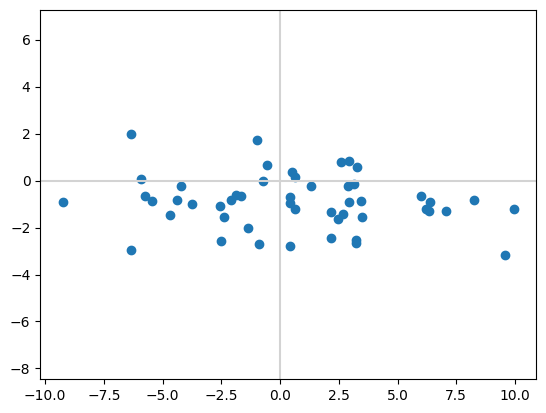

In [45]:
# sample 50 2D points from a normal distribution
# use mean 0
# use standard deviation of 5 along the x axis and 1 along the y axis to
# essentially sample noisy points along a horizontal line
mean = [0,0]
std = [5,1]
size = (50,2)
data = np.random.normal(mean,std,size)

# skew the line vertically by a random amount
data[:, 1] += np.random.randn()

# this is just to plot the data
plt.scatter(*data.T)
plt.axis('equal')
plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')

### Perform linear regression

In [46]:
X = data[:,0:1]
b = data[:,1:2]
w = (np.linalg.inv(X.T @ X))@ X.T @ b
X.shape, b.shape, w

((50, 1), (50, 1), array([[-0.07055296]]))

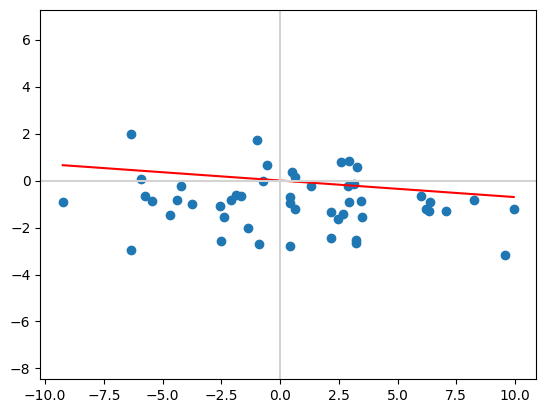

In [47]:
plt.scatter(*data.T)
plt.plot([X.min(), X.max()], np.array([X.min() * w, X.max() * w]).flatten(), color='red')
plt.axis('equal')
plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')

# Submitting

To submit, download the file as `.ipynb` and upload it to the correct assignment on Gradescope.